In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\moham\AppData\Local\Temp\ipykernel_68\3651292454.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michel,29,90000
2,Mohan,28,61000
3,Hmail,42,60000
4,Kory,39,150000


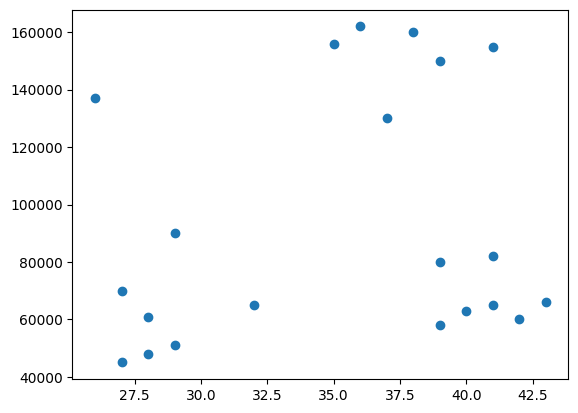

In [3]:
plt.scatter(df["Age"],df["Income($)"])

In [8]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0])

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michel,29,90000,2
2,Mohan,28,61000,0
3,Hmail,42,60000,0
4,Kory,39,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


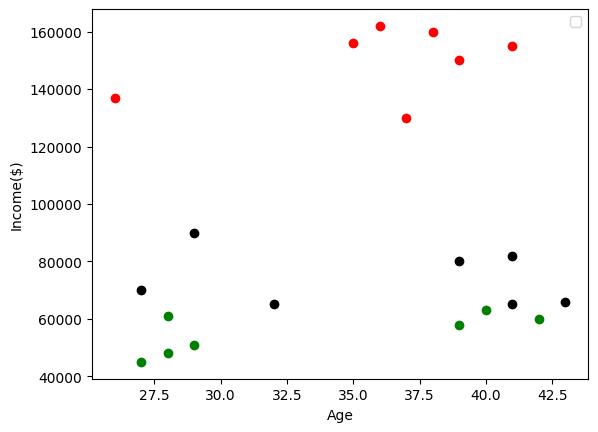

In [21]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [38]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michel,0.176471,0.384615,2
2,Mohan,0.117647,0.136752,0
3,Hmail,0.941176,0.128205,0
4,Kory,0.764706,0.897436,1
5,Gautham,0.882353,0.940171,1
6,David,0.705882,0.982906,1
7,Anderea,0.588235,1.000000,1
8,Erad,0.529412,0.948718,1
9,Argelia,0.647059,0.726496,1


In [42]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [43]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michel,0.176471,0.384615,1
2,Mohan,0.117647,0.136752,1
3,Hmail,0.941176,0.128205,0
4,Kory,0.764706,0.897436,2
5,Gautham,0.882353,0.940171,2
6,David,0.705882,0.982906,2
7,Anderea,0.588235,1.000000,2
8,Erad,0.529412,0.948718,2
9,Argelia,0.647059,0.726496,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


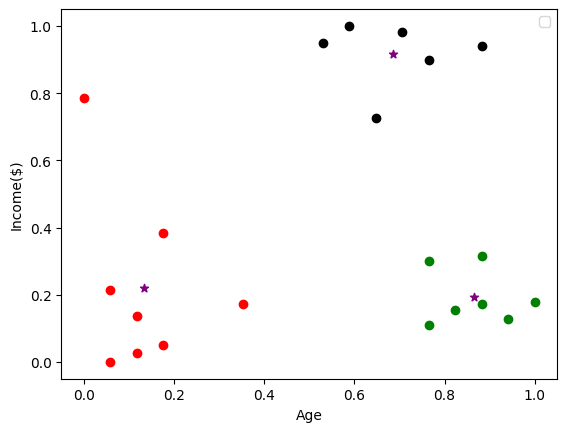

In [47]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],color='purple',marker='*')
plt.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],color='purple',marker='*')
plt.scatter(km.cluster_centers_[2,0],km.cluster_centers_[2,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [45]:
km.cluster_centers_

array([[0.86554622, 0.19413919],
       [0.13235294, 0.22115385],
       [0.68627451, 0.91595442]])

In [52]:
k_rng=range(1,10)
ssc=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    ssc.append([km.inertia_])
ssc

[[5.115874820189728],
 [2.598185246175664],
 [0.802369001641471],
 [0.38427482134044694],
 [0.31056446573851126],
 [0.2866865259465739],
 [0.2357217166343833],
 [0.18711826559399977],
 [0.10862420537693362]]

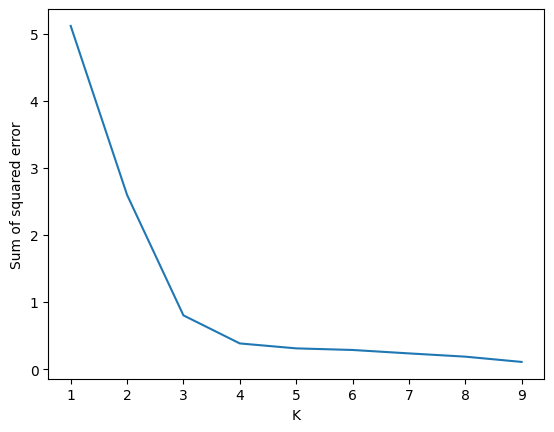

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,ssc)